# **Data Generation**

In [ ]:
import numpy as np
import pandas as pd


n = 50
d = 3

x = np.random.uniform(-1, 1, (n, d))
print("input data shape:")
print(x.shape)

#y1 = x1^2 + 2*x2 + x3
#y2 = x1^3 + 2*x2^2 + 5*x3
def f(x):
  y1 =  (x[:,0]*x[:,0]) + (2*x[:,1]) + x[:,2]
  y2 = (x[:,0]*x[:,0]*x[:,0]) + (2*x[:,1]*x[:,1]) + (5*x[:,2])
  return np.vstack((y1,y2)).T

y_true = f(x)

print("Output data shape:")
print(y_true.shape)

input data shape:
(50, 3)
Output data shape:
(50, 2)


# **3 layer NN using Numpy**

In [ ]:
class LinearWithTwoOutputs:
  def __init__ (self, input_dim, num_hidden=1):
    w1 = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    w2 = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.weights = np.hstack((w1,w2))
    self.bias = np.zeros(1)

  def __call__(self, x):
    self.x = x
    y = x @ self.weights + self.bias
    return y

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum()
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr*self.weights_gradient
    self.bias = self.bias - lr*self.bias_gradient


In [ ]:
class Relu:
  def __call__(self, input_):
    self.input = input_
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, gradient):
    self.input_gradient = (self.input > 0) * gradient
    return self.input_gradient

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true-y_pred) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

In [ ]:
def Display3D(ax, x, output):
  from sklearn.manifold import TSNE
  df_true = pd.concat([pd.DataFrame(x),pd.DataFrame(output)], axis=1)
  perplexity = 50
  tsne_3d = TSNE(n_components=3, perplexity=perplexity)
  TCs_3d = pd.DataFrame(tsne_3d.fit_transform(df_true))
  TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]
  ax.scatter3D(TCs_3d['TC1_3d'], TCs_3d['TC2_3d'], TCs_3d['TC3_3d'])

def DisplayPlotAndLoss(x, y_true, y_pred):
  
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  Display3D(ax, x, y_true)
  Display3D(ax, x, y_pred)
  plt.tight_layout()
  plt.show()


In [ ]:
class Model:
  def __init__(self, input_dim):
    self.second_layer = LinearWithTwoOutputs(input_dim)
    self.relu = Relu()
    self.third_layer = LinearWithTwoOutputs(2)

  def forward(self, x):
    second_layer_output = self.second_layer(x)
    relu_output = self.relu(second_layer_output)
    return self.third_layer(relu_output)


  def backward(self, gradient):
    third_layer_gradient = self.third_layer.backward(gradient)
    relu_gradient = self.relu.backward(third_layer_gradient)
    self.second_layer.backward(relu_gradient)

  def update(self, lr):
    self.second_layer.update(0.1)
    self.third_layer.update(0.1)

  def fit(self, x, y_true, epoch, lr):
    for i in range(epoch):
      loss = MSE()
      y = self.forward(x)
      cost = loss(y, y_true)
      print(f"Epoch: {i+1} ===> loss: {cost}")
      loss_gradient = loss.backward()
      self.backward(loss_gradient)
      self.update(lr)
    return y


In [ ]:
model = Model(d)
y_pred = model.fit(x, y_true, 20, 0.1)

Epoch: 1 ===> loss: 6.83334114668212
Epoch: 2 ===> loss: 5.645033427715687
Epoch: 3 ===> loss: 5.057480254671639
Epoch: 4 ===> loss: 4.621590614608676
Epoch: 5 ===> loss: 3.938142631978746
Epoch: 6 ===> loss: 3.4007092501257206
Epoch: 7 ===> loss: 2.8340504292389657
Epoch: 8 ===> loss: 2.295745179768635
Epoch: 9 ===> loss: 1.8889578416187767
Epoch: 10 ===> loss: 1.4536428318842456
Epoch: 11 ===> loss: 1.2279725183841401
Epoch: 12 ===> loss: 1.098505400054767
Epoch: 13 ===> loss: 0.997477753209284
Epoch: 14 ===> loss: 0.922817118368492
Epoch: 15 ===> loss: 0.8598149676577637
Epoch: 16 ===> loss: 0.8205464975861674
Epoch: 17 ===> loss: 0.7947348325419651
Epoch: 18 ===> loss: 0.7744877226298685
Epoch: 19 ===> loss: 0.7586381803194697
Epoch: 20 ===> loss: 0.744156886638597


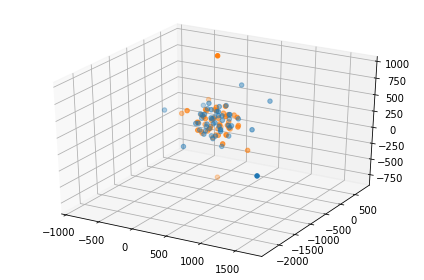

In [ ]:
DisplayPlotAndLoss(x, y_true, y_pred)